### 학습목표 

- 웹 스크래핑 : 웹 사이트 상에서 위치를 지정해서 원하는 데이터를 추출하는 방법(정적 파일)
    - 식별자가 없으면 node walking 태그를 따라 타고 들어간다 
    - 식별자가 있으면 selector를 이용해서 다이렉트로 접근 가능

- 웹 크롤링 : 자동화 봇을 이용하여 링크를 따라서 연결된 페이지를 가져와서 원하는 데이터를 추출하는 방법(동적 파일)

- BeautifulSoup & Selenium

In [21]:
import numpy as np
import pandas as pd

%matplotlib inline

from datetime import date,datetime,timedelta
from dateutil.parser import parse

import json
import re
from glob import glob

import seaborn as sns
import folium as g

import matplotlib.pyplot as plt
from matplotlib import rc
# 한글 폰트 문제 해결
rc('font', family='AppleGothic')
# 차트 축 <- 음수 부호 지원
plt.rcParams['axes.unicode_minus'] = False

In [7]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests

#### 1. BeautifulSoup 시작

In [27]:
webpage = requests.get('https://www.daangn.com/hot_articles')
webpage.text # 문자열로 돌려준다 => 뷰티풀숲을 활용해서 parsing해줘야한다

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n  <meta charset="utf-8">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no">\n      <link rel="canonical" href="https://www.daangn.com/hot_articles" />\n\n  <title>당근마켓 중고거래 | 당신 근처의 당근마켓</title>\n<meta name="description" content="당근마켓에서 거래되는 인기 중고 매물을 소개합니다. 지금 당근마켓에서 거래되고 있는 다양한 매물을 구경해보세요." />\n<link rel="author" href="당근마켓" />\n<meta property="og:url" content="https://www.daangn.com/hot_articles" />\n<meta property="og:title" content="당근마켓 중고거래 | 당신 근처의 당근마켓" />\n<meta property="og:description" content="당근마켓에서 거래되는 인기 중고 매물을 소개합니다. 지금 당근마켓에서 거래되고 있는 다양한 매물을 구경해보세요." />\n<meta property="og:site_name" content="당근마켓" />\n<meta property="og:image" content="https://www.daangn.com/images/meta/home/flea_market.png" />\n<meta property="og:type" content="article" />\n<meta property="og:locale" content="ko_KR" />\n<meta property="fb:app_id" 

In [11]:
webpage = requests.get('https://www.daangn.com/hot_articles')
soup = BeautifulSoup(webpage.text,'html.parser')
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/>
<link href="https://www.daangn.com/hot_articles" rel="canonical"/>
<title>당근마켓 중고거래 | 당신 근처의 당근마켓</title>
<meta content="당근마켓에서 거래되는 인기 중고 매물을 소개합니다. 지금 당근마켓에서 거래되고 있는 다양한 매물을 구경해보세요." name="description">
<link href="당근마켓" rel="author"/>
<meta content="https://www.daangn.com/hot_articles" property="og:url">
<meta content="당근마켓 중고거래 | 당신 근처의 당근마켓" property="og:title">
<meta content="당근마켓에서 거래되는 인기 중고 매물을 소개합니다. 지금 당근마켓에서 거래되고 있는 다양한 매물을 구경해보세요." property="og:description"/>
<meta content="당근마켓" property="og:site_name"/>
<meta content="https://www.daangn.com/images/meta/home/flea_market.png" property="og:image"/>
<meta content="article" property="og:type"/>
<meta content="ko_KR" property="og:locale"/>
<meta content="1463621440622064" property="fb:app_id"/>
<meta content=

#### 2. 태그  
- 가장 처음 등장하는 태그를 중심으로 가져온다

In [12]:
webpage = requests.get('https://www.daangn.com/hot_articles')
soup = BeautifulSoup(webpage.text,'html.parser')
soup.h1

<h1 id="fixed-bar-logo-title">
<a href="https://www.daangn.com/">
<span class="sr-only">당근마켓</span>
<img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
</a> </h1>

In [15]:
for child in soup.h1.children : 
    print(child)



<a href="https://www.daangn.com/">
<span class="sr-only">당근마켓</span>
<img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
</a>
 


In [18]:
for parent in soup.h1.parents : 
    print(parent)

<div id="fixed-bar-wrap">
<h1 id="fixed-bar-logo-title">
<a href="https://www.daangn.com/">
<span class="sr-only">당근마켓</span>
<img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
</a> </h1>
<section id="fixed-bar-search">
<div class="search-input-wrap">
<span class="sr-only">검색</span>
<input class="fixed-search-input" id="header-search-input" name="header-search-input" placeholder="동네 이름, 물품명 등을 검색해보세요!" type="text"/>
<button id="header-search-button">
<img alt="Search" class="fixed-search-icon" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/search-icon-7008edd4f9aaa32188f55e65258f1c1905d7a9d1a3ca2a07ae809b5535380f14.svg"/>
</button>
</div>
</section>
<section class="fixed-bar-menu">
<div class="fixed-download-wrapper">
<input class="fixed-checkbox" id="fixed-menu-checkbox" type="checkbox"/>
<label class="fixed-label" for="fixed-menu-ch

#### 3. bs4 함수

- find_all() : 원하는 부부을 모두 모두 가져온다

In [20]:
webpage = requests.get('https://www.daangn.com/hot_articles')
soup = BeautifulSoup(webpage.text,'html.parser')
soup.find_all('h2')

[<h2 class="card-title">그래픽카드 PT-GTX1060</h2>,
 <h2 class="card-title">스팸선물세트 명절 추석 스팸3호</h2>,
 <h2 class="card-title">전자레인지 싸게 가져가세요~</h2>,
 <h2 class="card-title">전자레인지 수납장</h2>,
 <h2 class="card-title">캠핑용품 강염버너 그리들버너 코베아 캠프1</h2>,
 <h2 class="card-title">콤프레샤</h2>,
 <h2 class="card-title">전기자전거  판매합니다..</h2>,
 <h2 class="card-title">캠핑 우드선반 방출합니다~</h2>,
 <h2 class="card-title">스팸클래식 340g / 200g</h2>,
 <h2 class="card-title">노스피크퍼시픽오션소이</h2>,
 <h2 class="card-title">밤고구마 10kg 박스판매 합니다.</h2>,
 <h2 class="card-title">넘버앤 릴렉스 체어 / 캠핑 의자</h2>,
 <h2 class="card-title">엘파마 MTB 자전거 코비 MT-5000</h2>,
 <h2 class="card-title">[이사정리] 캠핑 의자 + 테이블 + 수납가방 세트</h2>,
 <h2 class="card-title">컴퓨터</h2>,
 <h2 class="card-title">LG냉장고</h2>,
 <h2 class="card-title">전자렌지 커피포트 전기밥솥 판매합니다</h2>,
 <h2 class="card-title">갤럭시 버즈 플러스 </h2>,
 <h2 class="card-title">네스프레소 머신</h2>,
 <h2 class="card-title">자전거</h2>,
 <h2 class="card-title">LG 작은 냉장고 </h2>,
 <h2 class="card-title">쉐보레 자전거 팝니다</h2>,
 <h2 class="card-tit

- 정규표현식 활요가능

In [24]:
soup.find_all(re.compile('h[1-9]'))

[<h1 id="fixed-bar-logo-title">
 <a href="https://www.daangn.com/">
 <span class="sr-only">당근마켓</span>
 <img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
 </a> </h1>,
 <h1 class="head-title" id="hot-articles-head-title">
     
     
     중고거래 인기매물
   </h1>,
 <h2 class="card-title">그래픽카드 PT-GTX1060</h2>,
 <h2 class="card-title">스팸선물세트 명절 추석 스팸3호</h2>,
 <h2 class="card-title">전자레인지 싸게 가져가세요~</h2>,
 <h2 class="card-title">전자레인지 수납장</h2>,
 <h2 class="card-title">캠핑용품 강염버너 그리들버너 코베아 캠프1</h2>,
 <h2 class="card-title">콤프레샤</h2>,
 <h2 class="card-title">전기자전거  판매합니다..</h2>,
 <h2 class="card-title">캠핑 우드선반 방출합니다~</h2>,
 <h2 class="card-title">스팸클래식 340g / 200g</h2>,
 <h2 class="card-title">노스피크퍼시픽오션소이</h2>,
 <h2 class="card-title">밤고구마 10kg 박스판매 합니다.</h2>,
 <h2 class="card-title">넘버앤 릴렉스 체어 / 캠핑 의자</h2>,
 <h2 class="card-title">엘파마 MTB 자전거 코비 MT-5000</h2>,
 <h2 

- 리스트 형식으로 넘겨주면 2개이상 찾을수 있음 

In [25]:
soup.find_all(['h1','p'])

[<h1 id="fixed-bar-logo-title">
 <a href="https://www.daangn.com/">
 <span class="sr-only">당근마켓</span>
 <img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
 </a> </h1>,
 <h1 class="head-title" id="hot-articles-head-title">
     
     
     중고거래 인기매물
   </h1>,
 <p>당근마켓 앱에서 따뜻한 거래를 직접 경험해보세요!</p>]

- 속성을 활용하는법

In [26]:
soup.find_all(attrs={'class':'card-title'})

[<h2 class="card-title">그래픽카드 PT-GTX1060</h2>,
 <h2 class="card-title">스팸선물세트 명절 추석 스팸3호</h2>,
 <h2 class="card-title">전자레인지 싸게 가져가세요~</h2>,
 <h2 class="card-title">전자레인지 수납장</h2>,
 <h2 class="card-title">캠핑용품 강염버너 그리들버너 코베아 캠프1</h2>,
 <h2 class="card-title">콤프레샤</h2>,
 <h2 class="card-title">전기자전거  판매합니다..</h2>,
 <h2 class="card-title">캠핑 우드선반 방출합니다~</h2>,
 <h2 class="card-title">스팸클래식 340g / 200g</h2>,
 <h2 class="card-title">노스피크퍼시픽오션소이</h2>,
 <h2 class="card-title">밤고구마 10kg 박스판매 합니다.</h2>,
 <h2 class="card-title">넘버앤 릴렉스 체어 / 캠핑 의자</h2>,
 <h2 class="card-title">엘파마 MTB 자전거 코비 MT-5000</h2>,
 <h2 class="card-title">[이사정리] 캠핑 의자 + 테이블 + 수납가방 세트</h2>,
 <h2 class="card-title">컴퓨터</h2>,
 <h2 class="card-title">LG냉장고</h2>,
 <h2 class="card-title">전자렌지 커피포트 전기밥솥 판매합니다</h2>,
 <h2 class="card-title">갤럭시 버즈 플러스 </h2>,
 <h2 class="card-title">네스프레소 머신</h2>,
 <h2 class="card-title">자전거</h2>,
 <h2 class="card-title">LG 작은 냉장고 </h2>,
 <h2 class="card-title">쉐보레 자전거 팝니다</h2>,
 <h2 class="card-tit

In [29]:
soup.find_all(attrs={'id':'hot-articles-navigation'})

[<nav id="hot-articles-navigation">
 <select class="hot-articles-nav-select" id="region1" name="region1" onchange="changeRegion('r1', this.value)"><option value="">지역을 선택하세요</option><option value="서울특별시">서울특별시</option>
 <option value="부산광역시">부산광역시</option>
 <option value="대구광역시">대구광역시</option>
 <option value="인천광역시">인천광역시</option>
 <option value="광주광역시">광주광역시</option>
 <option value="대전광역시">대전광역시</option>
 <option value="울산광역시">울산광역시</option>
 <option value="세종특별자치시">세종특별자치시</option>
 <option value="경기도">경기도</option>
 <option value="강원도">강원도</option>
 <option value="충청북도">충청북도</option>
 <option value="충청남도">충청남도</option>
 <option value="전라북도">전라북도</option>
 <option value="전라남도">전라남도</option>
 <option value="경상북도">경상북도</option>
 <option value="경상남도">경상남도</option>
 <option value="제주특별자치도">제주특별자치도</option>
 <option value="집현동">집현동</option></select>
 <select class="hot-articles-nav-select" disabled="disabled" id="region2" name="region2" onchange="changeRegion('r2', this.value)"><option val

#### 4. css 선택자를 통한 접근
- id : #
- class : .

In [28]:
soup.select('.card-title')

[<h2 class="card-title">그래픽카드 PT-GTX1060</h2>,
 <h2 class="card-title">스팸선물세트 명절 추석 스팸3호</h2>,
 <h2 class="card-title">전자레인지 싸게 가져가세요~</h2>,
 <h2 class="card-title">전자레인지 수납장</h2>,
 <h2 class="card-title">캠핑용품 강염버너 그리들버너 코베아 캠프1</h2>,
 <h2 class="card-title">콤프레샤</h2>,
 <h2 class="card-title">전기자전거  판매합니다..</h2>,
 <h2 class="card-title">캠핑 우드선반 방출합니다~</h2>,
 <h2 class="card-title">스팸클래식 340g / 200g</h2>,
 <h2 class="card-title">노스피크퍼시픽오션소이</h2>,
 <h2 class="card-title">밤고구마 10kg 박스판매 합니다.</h2>,
 <h2 class="card-title">넘버앤 릴렉스 체어 / 캠핑 의자</h2>,
 <h2 class="card-title">엘파마 MTB 자전거 코비 MT-5000</h2>,
 <h2 class="card-title">[이사정리] 캠핑 의자 + 테이블 + 수납가방 세트</h2>,
 <h2 class="card-title">컴퓨터</h2>,
 <h2 class="card-title">LG냉장고</h2>,
 <h2 class="card-title">전자렌지 커피포트 전기밥솥 판매합니다</h2>,
 <h2 class="card-title">갤럭시 버즈 플러스 </h2>,
 <h2 class="card-title">네스프레소 머신</h2>,
 <h2 class="card-title">자전거</h2>,
 <h2 class="card-title">LG 작은 냉장고 </h2>,
 <h2 class="card-title">쉐보레 자전거 팝니다</h2>,
 <h2 class="card-tit

In [36]:
print(type(soup.select('.card-title'))) # <class 'bs4.element.ResultSet'>이라고 나오지만 리스트 형식과 비슷하다
for title in soup.select('.card-title'):
    print(title.text,title.get_text()) # 동일하다

<class 'bs4.element.ResultSet'>
그래픽카드 PT-GTX1060 그래픽카드 PT-GTX1060
스팸선물세트 명절 추석 스팸3호 스팸선물세트 명절 추석 스팸3호
전자레인지 싸게 가져가세요~ 전자레인지 싸게 가져가세요~
전자레인지 수납장 전자레인지 수납장
캠핑용품 강염버너 그리들버너 코베아 캠프1 캠핑용품 강염버너 그리들버너 코베아 캠프1
콤프레샤 콤프레샤
전기자전거  판매합니다.. 전기자전거  판매합니다..
캠핑 우드선반 방출합니다~ 캠핑 우드선반 방출합니다~
스팸클래식 340g / 200g 스팸클래식 340g / 200g
노스피크퍼시픽오션소이 노스피크퍼시픽오션소이
밤고구마 10kg 박스판매 합니다. 밤고구마 10kg 박스판매 합니다.
넘버앤 릴렉스 체어 / 캠핑 의자 넘버앤 릴렉스 체어 / 캠핑 의자
엘파마 MTB 자전거 코비 MT-5000 엘파마 MTB 자전거 코비 MT-5000
[이사정리] 캠핑 의자 + 테이블 + 수납가방 세트 [이사정리] 캠핑 의자 + 테이블 + 수납가방 세트
컴퓨터 컴퓨터
LG냉장고 LG냉장고
전자렌지 커피포트 전기밥솥 판매합니다 전자렌지 커피포트 전기밥솥 판매합니다
갤럭시 버즈 플러스  갤럭시 버즈 플러스 
네스프레소 머신 네스프레소 머신
자전거 자전거
LG 작은 냉장고  LG 작은 냉장고 
쉐보레 자전거 팝니다 쉐보레 자전거 팝니다
자전거 두대 팔아용 각 7만원입니다 자전거 두대 팔아용 각 7만원입니다
묵은쌀 드림 묵은쌀 드림
다혼 접이식 자전거 다혼 접이식 자전거
계양 14.4V ,, 디월트  10.8V 전동드릴 계양 14.4V ,, 디월트  10.8V 전동드릴
데스크탑 본체, 라이젠 3600, GTX1660 SUPER, 250GB 데스크탑 본체, 라이젠 3600, GTX1660 SUPER, 250GB
캠핑체어set (가방포함) 캠핑체어set (가방포함)
삼성 32인치 커브드 모니터 삼성 32인치 커브드 모니터
이케아 수납장 이케아 수납장
코스트코 고릴라랙(5단 철제선반) 코스트코 고릴라랙(5단 철제선반)


In [38]:
soup.select('#content')

[<section id="content">
 <h1 class="head-title" id="hot-articles-head-title">
     
     
     중고거래 인기매물
   </h1>
 <nav id="hot-articles-navigation">
 <select class="hot-articles-nav-select" id="region1" name="region1" onchange="changeRegion('r1', this.value)"><option value="">지역을 선택하세요</option><option value="서울특별시">서울특별시</option>
 <option value="부산광역시">부산광역시</option>
 <option value="대구광역시">대구광역시</option>
 <option value="인천광역시">인천광역시</option>
 <option value="광주광역시">광주광역시</option>
 <option value="대전광역시">대전광역시</option>
 <option value="울산광역시">울산광역시</option>
 <option value="세종특별자치시">세종특별자치시</option>
 <option value="경기도">경기도</option>
 <option value="강원도">강원도</option>
 <option value="충청북도">충청북도</option>
 <option value="충청남도">충청남도</option>
 <option value="전라북도">전라북도</option>
 <option value="전라남도">전라남도</option>
 <option value="경상북도">경상북도</option>
 <option value="경상남도">경상남도</option>
 <option value="제주특별자치도">제주특별자치도</option>
 <option value="집현동">집현동</option></select>
 <select class="hot-articles

In [61]:
# 자손  하위 태그
soup.select('#fixed-bar > div')

[<div id="fixed-bar-wrap">
 <h1 id="fixed-bar-logo-title">
 <a href="https://www.daangn.com/">
 <span class="sr-only">당근마켓</span>
 <img alt="당근마켓" class="fixed-logo" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/logo-basic-24b18257ac4ef693c02233bf21e9cb7ecbf43ebd8d5b40c24d99e14094a44c81.svg"/>
 </a> </h1>
 <section id="fixed-bar-search">
 <div class="search-input-wrap">
 <span class="sr-only">검색</span>
 <input class="fixed-search-input" id="header-search-input" name="header-search-input" placeholder="동네 이름, 물품명 등을 검색해보세요!" type="text"/>
 <button id="header-search-button">
 <img alt="Search" class="fixed-search-icon" src="https://d1unjqcospf8gs.cloudfront.net/assets/home/base/header/search-icon-7008edd4f9aaa32188f55e65258f1c1905d7a9d1a3ca2a07ae809b5535380f14.svg"/>
 </button>
 </div>
 </section>
 <section class="fixed-bar-menu">
 <div class="fixed-download-wrapper">
 <input class="fixed-checkbox" id="fixed-menu-checkbox" type="checkbox"/>
 <label class="fixed-label"

In [57]:
try : 
    html = urlopen('https://www.daangn.com/hot_articles')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup = BeautifulSoup(html.read(),'html.parser')
    print(soup)
    

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/>
<link href="https://www.daangn.com/hot_articles" rel="canonical"/>
<title>당근마켓 중고거래 | 당신 근처의 당근마켓</title>
<meta content="당근마켓에서 거래되는 인기 중고 매물을 소개합니다. 지금 당근마켓에서 거래되고 있는 다양한 매물을 구경해보세요." name="description">
<link href="당근마켓" rel="author"/>
<meta content="https://www.daangn.com/hot_articles" property="og:url">
<meta content="당근마켓 중고거래 | 당신 근처의 당근마켓" property="og:title">
<meta content="당근마켓에서 거래되는 인기 중고 매물을 소개합니다. 지금 당근마켓에서 거래되고 있는 다양한 매물을 구경해보세요." property="og:description"/>
<meta content="당근마켓" property="og:site_name"/>
<meta content="https://www.daangn.com/images/meta/home/flea_market.png" property="og:image"/>
<meta content="article" property="og:type"/>
<meta content="ko_KR" property="og:locale"/>
<meta content="1463621440622064" property="fb:app_id"/>
<meta content=

In [62]:
## 연습
try : 
    html = urlopen('http://www.pythonscraping.com/pages/page3.html')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup = BeautifulSoup(html.read(),'html.parser')
    print(soup)

<html>
<head>
<style>
img{
	width:75px;
}
table{
	width:50%;
}
td{
	margin:10px;
	padding:10px;
}
.wrapper{
	width:800px;
}
.excitingNote{
	font-style:italic;
	font-weight:bold;
}
</style>
</head>
<body>
<div id="wrapper">
<img src="../img/gifts/logo.jpg" style="float:left;"/>
<h1>Totally Normal Gifts</h1>
<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.<p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) frien

In [76]:
table = soup.select('#giftList .gift')
table

[<tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td><td>
 $10,005.00
 </td><td>
 <img src="../img/gifts/img3.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift4"><td>
 Dead Parrot
 </

In [123]:
table = soup.find('table',{'id':'giftList'})
for tr in table.find_all('tr'):
    tds = tr.find_all('td')
    for td in tds:
        print(td.text)


Vegetable Basket


This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
Now with super-colorful bell peppers!


$15.00





Russian Nesting Dolls


Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! 8 entire dolls per set! Octuple the presents!


$10,000.52





Fish Painting


If something seems fishy about this painting, it's because it's a fish! Also hand-painted by trained monkeys!


$10,005.00





Dead Parrot


This is an ex-parrot! Or maybe he's only resting?


$0.50





Mystery Box


If you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. Keep your friends guessing!


$1.50






In [137]:
title_list = []
desc_list = []
cost_list = []
img_list = []
data_list = []
table = soup.find('table',{'id':'giftList'})
for tr in table.find_all('tr'):
    tds = tr.find_all('td')
    element_list
    if tds:
        #print('*'*12)
        #print(tds[0].text)
        title_list.append(tds[0].text.strip('\n'))
        #print(tds[1].text)
        desc_list.append(tds[1].text.strip('\n'))
        #print(tds[2].text)
        cost_list.append(tds[2].text.strip('\n'))
        #print(tds[3].find('img')['src'])
        img_list.append(tds[3].find('img')['src'])


In [138]:
pd.DataFrame({'title':title_list,
              'desc':desc_list,
              'cost':cost_list,
              'img':img_list})

,title,desc,cost,img
0,Vegetable Basket,This vegetable basket is the perfect gift for ...,$15.00,../img/gifts/img1.jpg
1,Russian Nesting Dolls,"Hand-painted by trained monkeys, these exquisi...","$10,000.52",../img/gifts/img2.jpg
2,Fish Painting,"If something seems fishy about this painting, ...","$10,005.00",../img/gifts/img3.jpg
3,Dead Parrot,This is an ex-parrot! Or maybe he's only resting?,$0.50,../img/gifts/img4.jpg
4,Mystery Box,"If you love suprises, this mystery box is for ...",$1.50,../img/gifts/img6.jpg


In [144]:
# 연습
try : 
    html = urlopen('https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168#.YT62DJ6A4eb')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup = BeautifulSoup(html.read(),'html.parser')
    print(soup)

<!DOCTYPE html>

<html class="no-js">
<head>
<!-- Meta -->
<meta content="width=device-width" name="viewport"/>
<link href="http://purl.org/dc/elements/1.1/" rel="schema.DC"/><title>National Weather Service</title><meta content="National Weather Service" name="DC.title"><meta content="NOAA National Weather Service National Weather Service" name="DC.description"/><meta content="US Department of Commerce, NOAA, National Weather Service" name="DC.creator"/><meta content="" name="DC.date.created" scheme="ISO8601"/><meta content="EN-US" name="DC.language" scheme="DCTERMS.RFC1766"/><meta content="weather, National Weather Service" name="DC.keywords"/><meta content="NOAA's National Weather Service" name="DC.publisher"/><meta content="National Weather Service" name="DC.contributor"/><meta content="http://www.weather.gov/disclaimer.php" name="DC.rights"/><meta content="General" name="rating"/><meta content="index,follow" name="robots"/>
<!-- Icons -->
<link href="./images/favicon.ico" rel="shor

In [168]:
soup.select('#seven-day-forecast-list li')
for li in soup.select('#seven-day-forecast-list li'):
    display(li.select('p'))

[<p class="period-name">Tonight<br/><br/></p>,
 <p><img alt="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. " class="forecast-icon" src="newimages/medium/nsct.png" title="Tonight: Partly cloudy, with a low around 56. West southwest wind 15 to 20 mph decreasing to 9 to 14 mph in the evening. Winds could gust as high as 26 mph. "/></p>,
 <p class="short-desc">Partly Cloudy</p>,
 <p class="temp temp-low">Low: 56 °F</p>]

[<p class="period-name">Monday<br/><br/></p>,
 <p><img alt="Monday: Sunny, with a high near 71. West wind 5 to 10 mph increasing to 13 to 18 mph in the afternoon. Winds could gust as high as 24 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Monday: Sunny, with a high near 71. West wind 5 to 10 mph increasing to 13 to 18 mph in the afternoon. Winds could gust as high as 24 mph. "/></p>,
 <p class="short-desc">Sunny</p>,
 <p class="temp temp-high">High: 71 °F</p>]

[<p class="period-name">Monday<br/>Night</p>,
 <p><img alt="Monday Night: Mostly clear, with a low around 56. Southwest wind 9 to 18 mph, with gusts as high as 24 mph. " class="forecast-icon" src="newimages/medium/nfew.png" title="Monday Night: Mostly clear, with a low around 56. Southwest wind 9 to 18 mph, with gusts as high as 24 mph. "/></p>,
 <p class="short-desc">Mostly Clear</p>,
 <p class="temp temp-low">Low: 56 °F</p>]

[<p class="period-name">Tuesday<br/><br/></p>,
 <p><img alt="Tuesday: Sunny, with a high near 73. West southwest wind 5 to 10 mph increasing to 16 to 21 mph in the afternoon. Winds could gust as high as 28 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Tuesday: Sunny, with a high near 73. West southwest wind 5 to 10 mph increasing to 16 to 21 mph in the afternoon. Winds could gust as high as 28 mph. "/></p>,
 <p class="short-desc">Sunny</p>,
 <p class="temp temp-high">High: 73 °F</p>]

[<p class="period-name">Tuesday<br/>Night</p>,
 <p><img alt="Tuesday Night: Mostly clear, with a low around 56. Breezy, with a west southwest wind 14 to 23 mph, with gusts as high as 30 mph. " class="forecast-icon" src="DualImage.php?i=nwind_few&amp;j=nsct" title="Tuesday Night: Mostly clear, with a low around 56. Breezy, with a west southwest wind 14 to 23 mph, with gusts as high as 30 mph. "/></p>,
 <p class="short-desc">Mostly Clear<br/>and Breezy<br/>then Partly<br/>Cloudy</p>,
 <p class="temp temp-low">Low: 56 °F</p>]

[<p class="period-name">Wednesday<br/><br/></p>,
 <p><img alt="Wednesday: Mostly sunny, with a high near 70. Breezy. " class="forecast-icon" src="DualImage.php?i=sct&amp;j=wind_few" title="Wednesday: Mostly sunny, with a high near 70. Breezy. "/></p>,
 <p class="short-desc">Mostly Sunny<br/>then Sunny<br/>and Breezy</p>,
 <p class="temp temp-high">High: 70 °F</p>]

[<p class="period-name">Wednesday<br/>Night</p>,
 <p><img alt="Wednesday Night: Partly cloudy, with a low around 55. Breezy. " class="forecast-icon" src="DualImage.php?i=nwind_sct&amp;j=nbkn" title="Wednesday Night: Partly cloudy, with a low around 55. Breezy. "/></p>,
 <p class="short-desc">Partly Cloudy<br/>and Breezy<br/>then Mostly<br/>Cloudy</p>,
 <p class="temp temp-low">Low: 55 °F</p>]

[<p class="period-name">Thursday<br/><br/></p>,
 <p><img alt="Thursday: Mostly sunny, with a high near 66." class="forecast-icon" src="newimages/medium/sct.png" title="Thursday: Mostly sunny, with a high near 66."/></p>,
 <p class="short-desc">Mostly Sunny</p>,
 <p class="temp temp-high">High: 66 °F</p>]

[<p class="period-name">Thursday<br/>Night</p>,
 <p><img alt="Thursday Night: Partly cloudy, with a low around 55." class="forecast-icon" src="newimages/medium/nsct.png" title="Thursday Night: Partly cloudy, with a low around 55."/></p>,
 <p class="short-desc">Partly Cloudy</p>,
 <p class="temp temp-low">Low: 55 °F</p>]

In [167]:
soup.select('#seven-day-forecast-list li') # soup.select('#seven-day-forecast-list .forecast-tombstone') 
for li in soup.select('#seven-day-forecast-list li'):
    p_list = li.find_all('p')
    for p in p_list:
        if p.find('img'):
            print(p.find('img')['src'])
        else:
            print(p.text)

Tonight
newimages/medium/nsct.png
Partly Cloudy
Low: 56 °F
Monday
newimages/medium/few.png
Sunny
High: 71 °F
MondayNight
newimages/medium/nfew.png
Mostly Clear
Low: 56 °F
Tuesday
newimages/medium/few.png
Sunny
High: 73 °F
TuesdayNight
DualImage.php?i=nwind_few&j=nsct
Mostly Clearand Breezythen PartlyCloudy
Low: 56 °F
Wednesday
DualImage.php?i=sct&j=wind_few
Mostly Sunnythen Sunnyand Breezy
High: 70 °F
WednesdayNight
DualImage.php?i=nwind_sct&j=nbkn
Partly Cloudyand Breezythen MostlyCloudy
Low: 55 °F
Thursday
newimages/medium/sct.png
Mostly Sunny
High: 66 °F
ThursdayNight
newimages/medium/nsct.png
Partly Cloudy
Low: 55 °F


In [178]:
for div in soup.select('.tombstone-container'):
    p_list = div.select('p')
    for p in p_list:
        if p.select('img'):
            print(p.select('img')[0]['src'])
        else:
            print(p.text)

Tonight
newimages/medium/nsct.png
Partly Cloudy
Low: 56 °F
Monday
newimages/medium/few.png
Sunny
High: 71 °F
MondayNight
newimages/medium/nfew.png
Mostly Clear
Low: 56 °F
Tuesday
newimages/medium/few.png
Sunny
High: 73 °F
TuesdayNight
DualImage.php?i=nwind_few&j=nsct
Mostly Clearand Breezythen PartlyCloudy
Low: 56 °F
Wednesday
DualImage.php?i=sct&j=wind_few
Mostly Sunnythen Sunnyand Breezy
High: 70 °F
WednesdayNight
DualImage.php?i=nwind_sct&j=nbkn
Partly Cloudyand Breezythen MostlyCloudy
Low: 55 °F
Thursday
newimages/medium/sct.png
Mostly Sunny
High: 66 °F
ThursdayNight
newimages/medium/nsct.png
Partly Cloudy
Low: 55 °F


In [181]:
# class 속성 잘 이용해서 direct 접근 가능
display(soup.select('.tombstone-container .period-name'))
[p.text for p in soup.select('.tombstone-container .period-name')]

[<p class="period-name">Tonight<br/><br/></p>,
 <p class="period-name">Monday<br/><br/></p>,
 <p class="period-name">Monday<br/>Night</p>,
 <p class="period-name">Tuesday<br/><br/></p>,
 <p class="period-name">Tuesday<br/>Night</p>,
 <p class="period-name">Wednesday<br/><br/></p>,
 <p class="period-name">Wednesday<br/>Night</p>,
 <p class="period-name">Thursday<br/><br/></p>,
 <p class="period-name">Thursday<br/>Night</p>]

['Tonight',
 'Monday',
 'MondayNight',
 'Tuesday',
 'TuesdayNight',
 'Wednesday',
 'WednesdayNight',
 'Thursday',
 'ThursdayNight']

In [207]:
[p.find('img')['src'] for p in soup.select('.tombstone-container .forecast-icon')]

TypeError: 'NoneType' object is not subscriptable

In [198]:
# clas 속성 이용해서 df만들어보자
periods = [p.text for p in soup.select('.tombstone-container .period-name')]
descs = [p.text for p in soup.select('.tombstone-container .short-desc')]
imgs = [p['src'] for p in soup.select('.tombstone-container .forecast-icon')]
temps = [p.text for p in soup.select('.tombstone-container .temp')]
pd.DataFrame({
    'period':periods,
    'desc':descs,
    'img':imgs,
    'temp':temps
})

,period,desc,img,temp
0,Tonight,Partly Cloudy,newimages/medium/nsct.png,Low: 56 °F
1,Monday,Sunny,newimages/medium/few.png,High: 71 °F
2,MondayNight,Mostly Clear,newimages/medium/nfew.png,Low: 56 °F
3,Tuesday,Sunny,newimages/medium/few.png,High: 73 °F
4,TuesdayNight,Mostly Clearand Breezythen PartlyCloudy,DualImage.php?i=nwind_few&j=nsct,Low: 56 °F
5,Wednesday,Mostly Sunnythen Sunnyand Breezy,DualImage.php?i=sct&j=wind_few,High: 70 °F
6,WednesdayNight,Partly Cloudyand Breezythen MostlyCloudy,DualImage.php?i=nwind_sct&j=nbkn,Low: 55 °F
7,Thursday,Mostly Sunny,newimages/medium/sct.png,High: 66 °F
8,ThursdayNight,Partly Cloudy,newimages/medium/nsct.png,Low: 55 °F


In [210]:
# https://pythondojang.bitbucket.io/weather/observation/currentweather.html 접속
# 지점 현재 습도 가져오자
# 연습
try : 
    html = urlopen('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup = BeautifulSoup(html.read(),'html.parser')
    

[]

In [227]:
for tr in soup.select('tbody tr'):
    display(tr.select('.nm'))

[]

[]

[]

[]

[]

[]

[]

[]

[]

[<th class="nm" scope="col">지점</th>,
 <th class="nm" scope="col">현재일기</th>,
 <th class="nm" scope="col">시정</th>,
 <th class="nm" scope="col">운량</th>,
 <th class="nm" scope="col">중하운량</th>,
 <th class="nm" scope="col">현재기온</th>,
 <th class="nm" scope="col">이슬점온도</th>,
 <th class="nm" scope="col">불쾌지수</th>,
 <th class="nm" scope="col">일강수</th>,
 <th class="nm" scope="col">습도</th>,
 <th class="nm" scope="col">풍향</th>,
 <th class="nm" scope="col">풍속</th>,
 <th class="nm" scope="col">해면기압</th>]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[<th class="nm" scope="col">지점</th>,
 <th class="nm" scope="col">현재일기</th>,
 <th class="nm" scope="col">시정</th>,
 <th class="nm" scope="col">운량</th>,
 <th class="nm" scope="col">중하운량</th>,
 <th class="nm" scope="col">현재기온</th>,
 <th class="nm" scope="col">이슬점온도</th>,
 <th class="nm" scope="col">불쾌지수</th>,
 <th class="nm" scope="col">일강수</th>,
 <th class="nm" scope="col">습도</th>,
 <th class="nm" scope="col">풍향</th>,
 <th class="nm" scope="col">풍속</th>,
 <th class="nm" scope="col">해면기압</th>]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[<th class="nm" scope="col">지점</th>,
 <th class="nm" scope="col">현재일기</th>,
 <th class="nm" scope="col">시정</th>,
 <th class="nm" scope="col">운량</th>,
 <th class="nm" scope="col">중하운량</th>,
 <th class="nm" scope="col">현재기온</th>,
 <th class="nm" scope="col">이슬점온도</th>,
 <th class="nm" scope="col">불쾌지수</th>,
 <th class="nm" scope="col">일강수</th>,
 <th class="nm" scope="col">습도</th>,
 <th class="nm" scope="col">풍향</th>,
 <th class="nm" scope="col">풍속</th>,
 <th class="nm" scope="col">해면기압</th>]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[<th class="nm" scope="col">지점</th>,
 <th class="nm" scope="col">현재일기</th>,
 <th class="nm" scope="col">시정</th>,
 <th class="nm" scope="col">운량</th>,
 <th class="nm" scope="col">중하운량</th>,
 <th class="nm" scope="col">현재기온</th>,
 <th class="nm" scope="col">이슬점온도</th>,
 <th class="nm" scope="col">불쾌지수</th>,
 <th class="nm" scope="col">일강수</th>,
 <th class="nm" scope="col">습도</th>,
 <th class="nm" scope="col">풍향</th>,
 <th class="nm" scope="col">풍속</th>,
 <th class="nm" scope="col">해면기압</th>]

[]

[]

[]

[]

[<th class="nm" scope="col">지점</th>,
 <th class="nm" scope="col">현재일기</th>,
 <th class="nm" scope="col">시정</th>,
 <th class="nm" scope="col">운량</th>,
 <th class="nm" scope="col">중하운량</th>,
 <th class="nm" scope="col">현재기온</th>,
 <th class="nm" scope="col">이슬점온도</th>,
 <th class="nm" scope="col">불쾌지수</th>,
 <th class="nm" scope="col">일강수</th>,
 <th class="nm" scope="col">습도</th>,
 <th class="nm" scope="col">풍향</th>,
 <th class="nm" scope="col">풍속</th>,
 <th class="nm" scope="col">해면기압</th>]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

[]

In [237]:
data=[]
for tr in soup.select('tbody tr'):
    tds = tr.find_all('td')
    if tds:
        data.append([tds[0].find('a').text,tds[5].text,tds[9].text])

pd.DataFrame(data,columns=['location','temp','humidity'])

,location,temp,humidity
0,서울,25.6,30
1,백령도,18.4,62
2,인천,20.8,54
3,수원,25.0,41
4,동두천,24.9,34
...,...,...,...
90,합천,25.1,32
91,밀양,24.7,34
92,산청,24.8,41
93,거제,23.1,57


In [238]:
# 접속
# 선수명 AVG H HR RBI
# 연습
try : 
    html = urlopen('https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx')
    #print(html.read())
except HTTPError as he:
    print('http error')
except URLError as ue:
    print('url error')
else:
    soup = BeautifulSoup(html.read(),'html.parser')

    

<AxesSubplot:xlabel='name'>

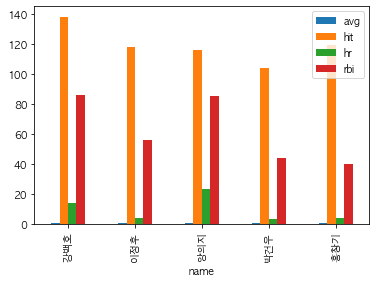

In [282]:
data = []
for tr in soup.find_all('tr'):
    tds = tr.find_all('td')
    if tds:
        name = tds[1].find('a').text
        avg = float(tds[3].text)
        hit = float(tds[8].text)
        hr = float(tds[11].text)
        rbi = float(tds[13].text)
        data.append([name,avg,hit,hr,rbi])
        
hitter_df = pd.DataFrame(data,columns=['name','avg','hit','hr','rbi'])
# hitter_df['avg'] = hitter_df['avg'].astype(float)
# hitter_df['hit'] = hitter_df['hit'].astype(float)
# hitter_df['hr'] = hitter_df['hr'].astype(float)
# hitter_df['rbi'] = hitter_df['rbi'].astype(float)

top5_df = hitter_df.head(5)
top5_df.set_index('name').plot(kind='bar')

<AxesSubplot:xlabel='name'>

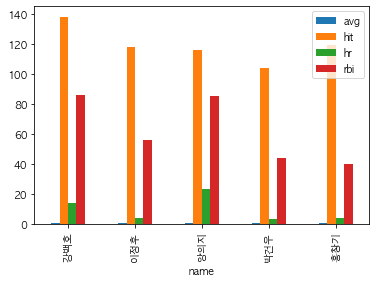

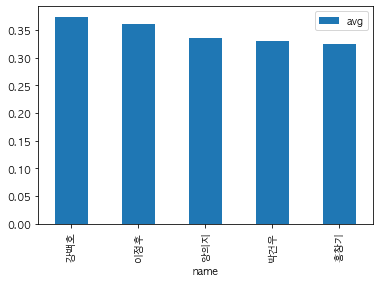

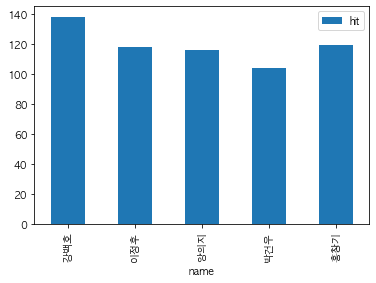

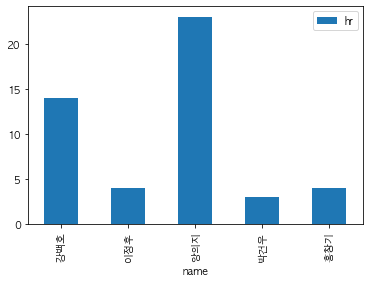

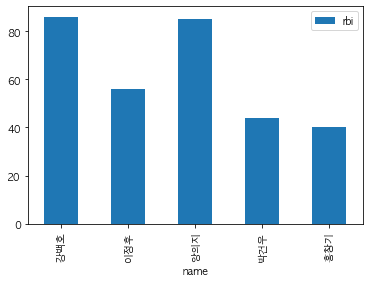

In [266]:
top5_df.set_index('name').plot(kind='bar')
top5_df[['name','avg']].set_index('name').plot(kind='bar')
top5_df[['name','hit']].set_index('name').plot(kind='bar')
top5_df[['name','hr']].set_index('name').plot(kind='bar')
top5_df[['name','rbi']].set_index('name').plot(kind='bar')